<a href="https://colab.research.google.com/github/mshapna/EDA_Timeseries/blob/Version1/EDA_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load and inspect your dataset
file_path = 'threeyears.csv'
df = pd.read_csv(file_path)
# Display the column names in the DataFrame
print(df.columns)
df.head()

Index(['DateTime', 'RH', 'Temperature', 'Index'], dtype='object')


,DateTime,RH,Temperature,Index
0,1/1/2021 0:00,18.60,21.26,Dry
1,1/1/2021 1:00,18.60,21.20,Dry
2,1/1/2021 2:00,18.49,21.17,Dry
3,1/1/2021 3:00,18.39,21.10,Dry
4,1/1/2021 4:00,18.35,21.04,Dry


In [3]:
df = pd.read_csv('threeyears.csv', parse_dates=['DateTime'], index_col="DateTime")
df.head()

,RH,Temperature,Index
DateTime,,,
2021-01-01 00:00:00,18.60,21.26,Dry
2021-01-01 01:00:00,18.60,21.20,Dry
2021-01-01 02:00:00,18.49,21.17,Dry
2021-01-01 03:00:00,18.39,21.10,Dry
2021-01-01 04:00:00,18.35,21.04,Dry


In [4]:
# Step 3: Extract time features
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek

# Handling DateTime as a Timestamp
df['Timestamp'] = df.index.astype(int) / 10**9

# Step 6: Categorical encoding
ordinal_mapping = {'Comfortable': 0, 'Uncomfortable': 1, 'Dry': 2, 'Humid': 3, 'Hot': 4, 'Cold': 5}
df['Index_encoded'] = df['Index'].map(ordinal_mapping)


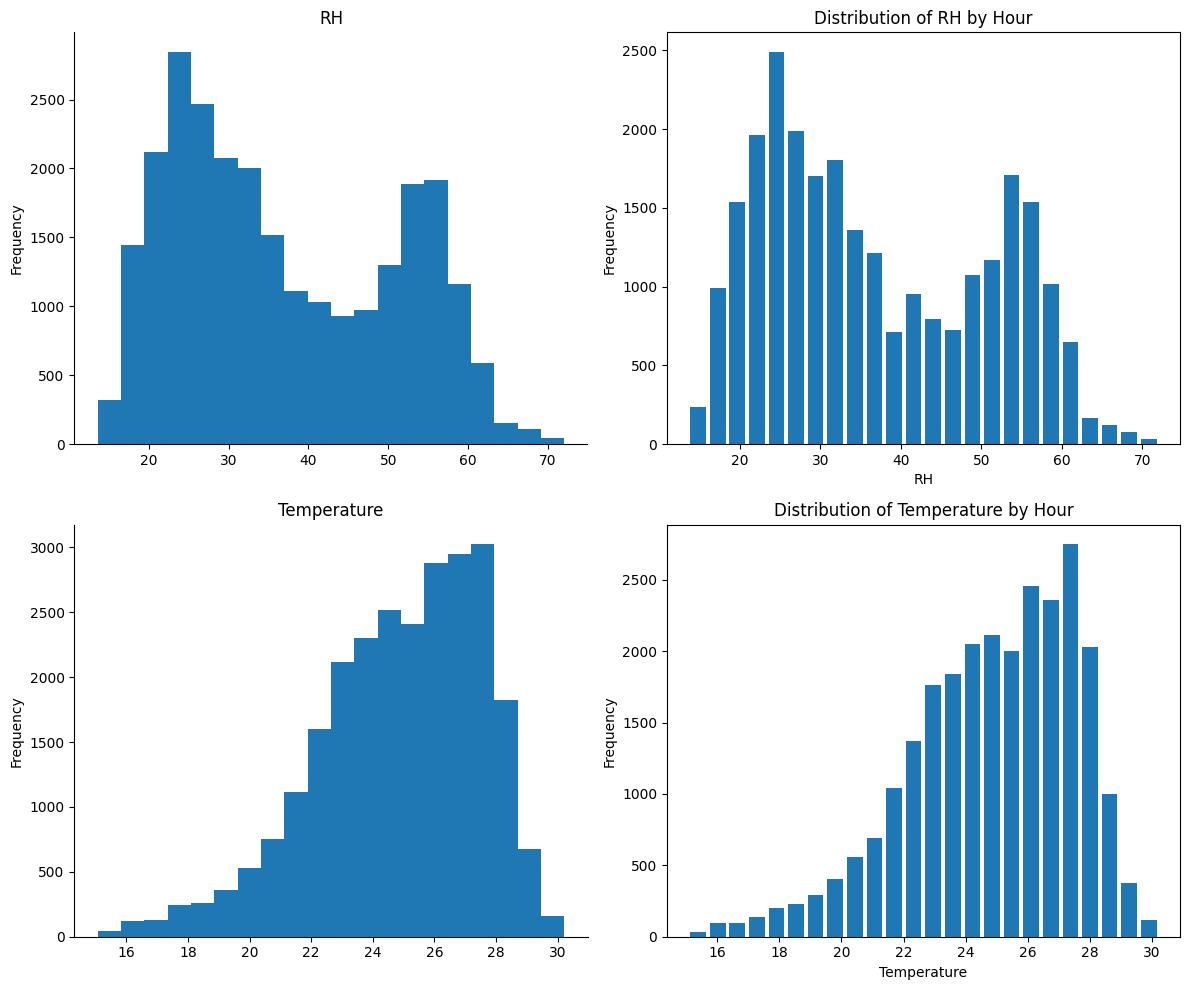

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Histogram of RH
df['RH'].plot(kind='hist', bins=20, ax=axes[0, 0])
axes[0, 0].set_title('RH')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot 2: Distribution of RH by Hour
axes[0, 1].hist(df['RH'], bins=24, histtype='bar', rwidth=0.8)
axes[0, 1].set_xlabel('RH')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of RH by Hour')

# Plot 3: Histogram of Temperature
df['Temperature'].plot(kind='hist', bins=20, ax=axes[1, 0])
axes[1, 0].set_title('Temperature')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot 4: Distribution of Temperature by Hour
axes[1, 1].hist(df['Temperature'], bins=24, histtype='bar', rwidth=0.8)
axes[1, 1].set_xlabel('Temperature')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Temperature by Hour')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


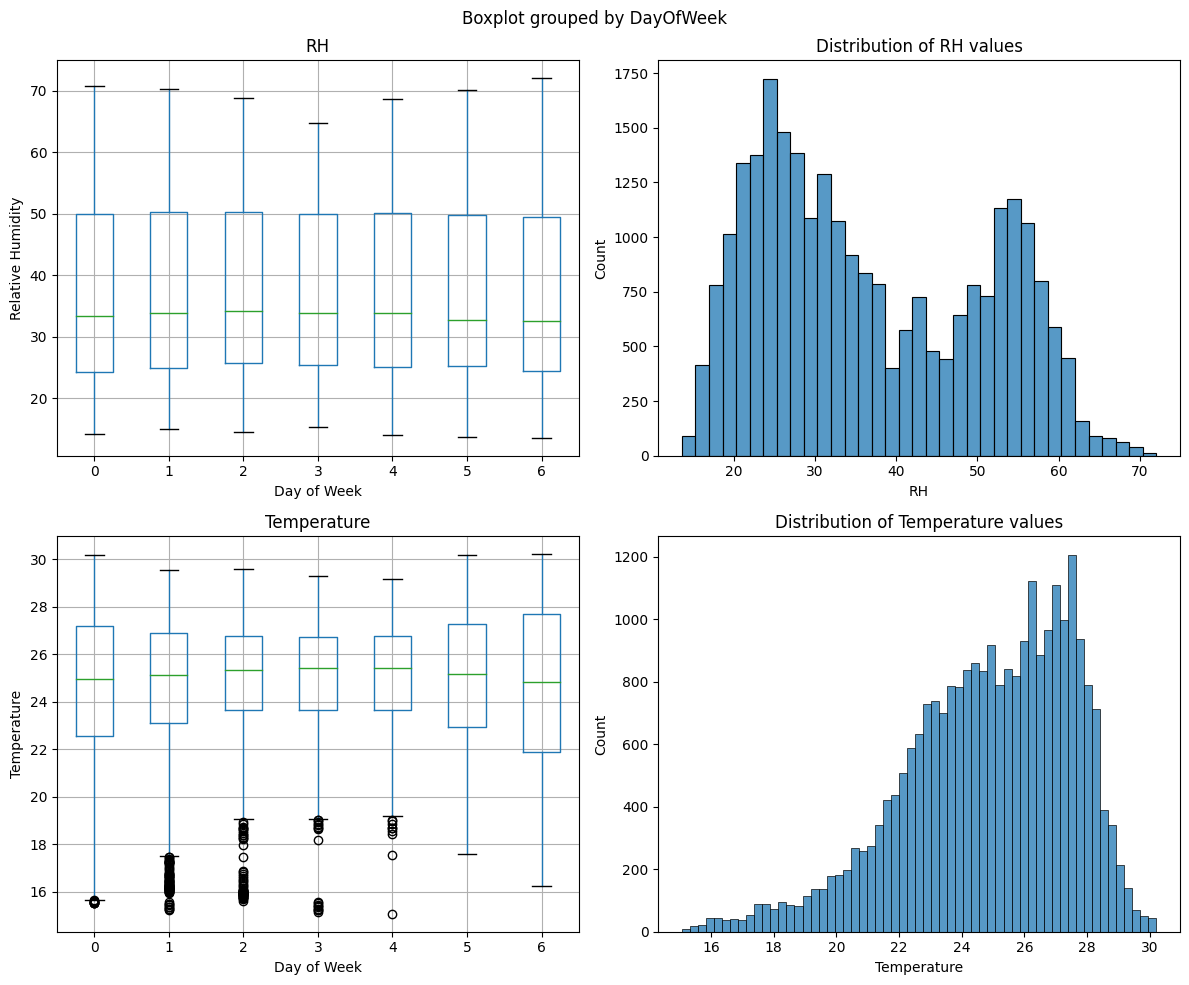

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Relative Humidity by Day of Week
df.boxplot(column='RH', by='DayOfWeek', ax=axes[0, 0])
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Relative Humidity')

# Plot 2: Distribution of RH values using seaborn
sns.histplot(x="RH", data=df, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of RH values')

# Plot 3: Temperature by Day of Week
df.boxplot(column='Temperature', by='DayOfWeek', ax=axes[1, 0])
axes[1, 0].set_xlabel('Day of Week')
axes[1, 0].set_ylabel('Temperature')

# Plot 4: Distribution of Temperature values using seaborn
sns.histplot(x="Temperature", data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Temperature values')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


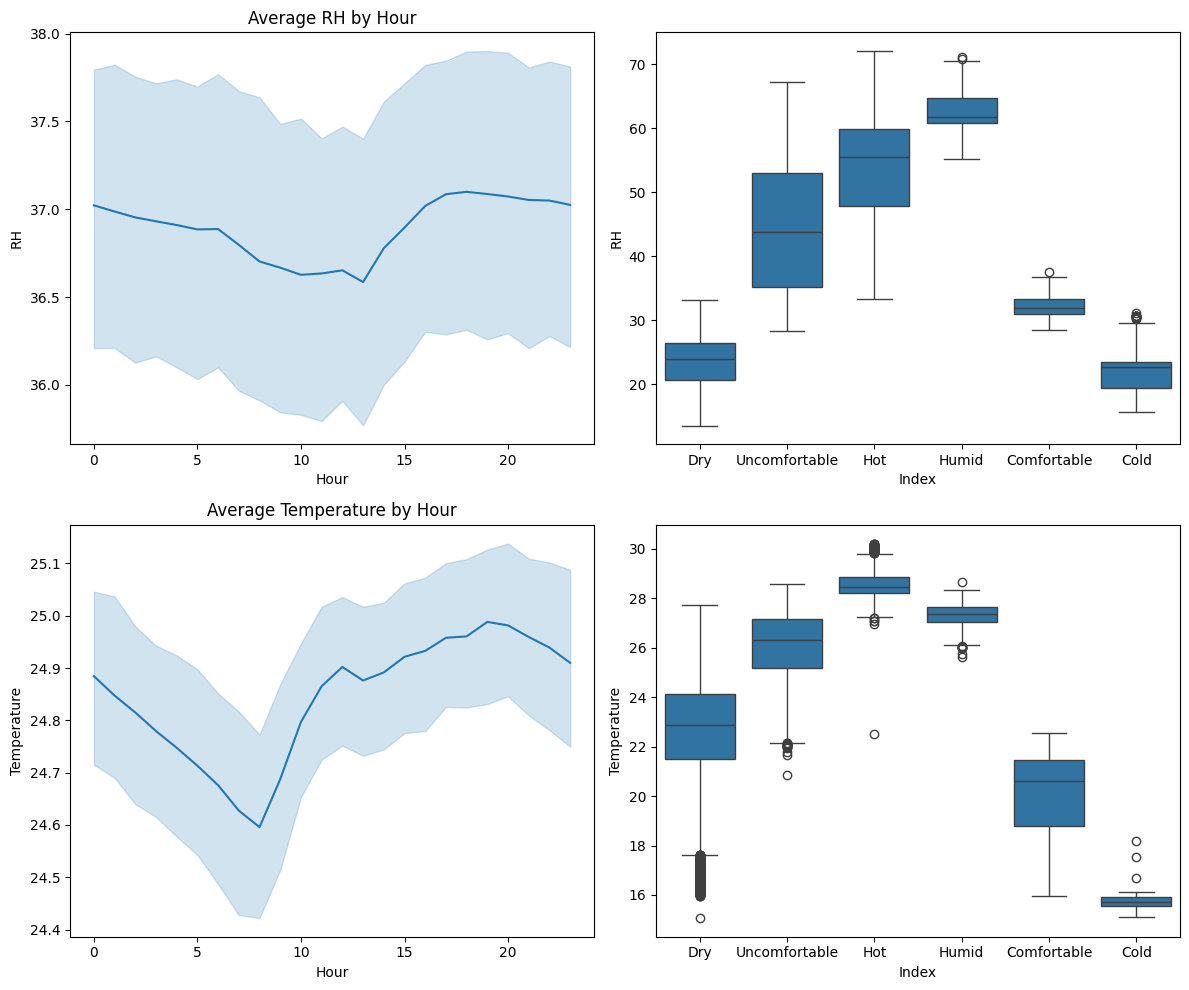

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: Average RH by Hour
sns.lineplot(data=df, x="Hour", y="RH", estimator="mean", ax=axes[0, 0])
axes[0, 0].set_title('Average RH by Hour')

# Plot 2: RH distribution by Index
sns.boxplot(x='Index', y='RH', data=df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Index')
axes[0, 1].set_ylabel('RH')

# Plot 3: Average Temperature by Hour
sns.lineplot(data=df, x="Hour", y="Temperature", estimator="mean", ax=axes[1, 0])
axes[1, 0].set_title('Average Temperature by Hour')

# Plot 4: Temperature distribution by Index
sns.boxplot(x='Index', y='Temperature', data=df, ax=axes[1, 1])
axes[1, 1].set_xlabel('Index')
axes[1, 1].set_ylabel('Temperature')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


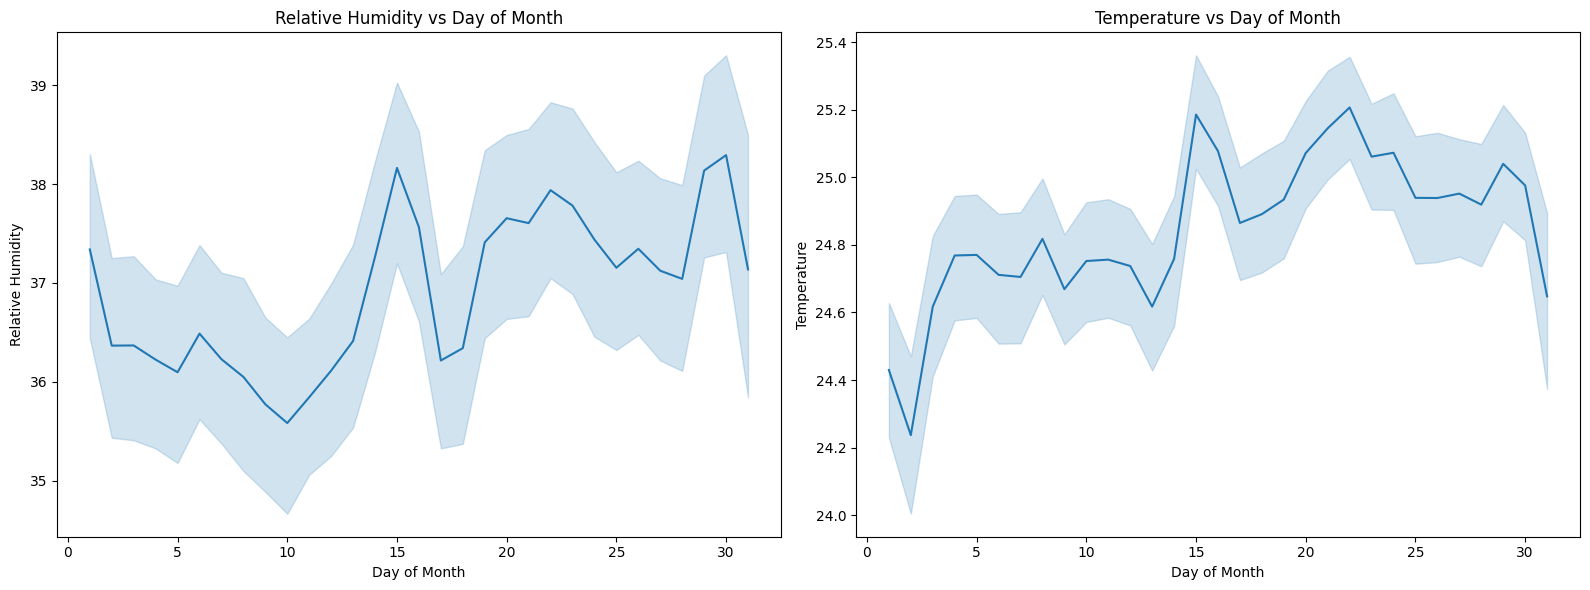

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot RH vs Day of Month
sns.lineplot(data=df, x='Day', y='RH', ax=axes[0])
axes[0].set_xlabel('Day of Month')
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title('Relative Humidity vs Day of Month')

# Plot Temperature vs Day of Month
sns.lineplot(data=df, x='Day', y='Temperature', ax=axes[1])
axes[1].set_xlabel('Day of Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Temperature vs Day of Month')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


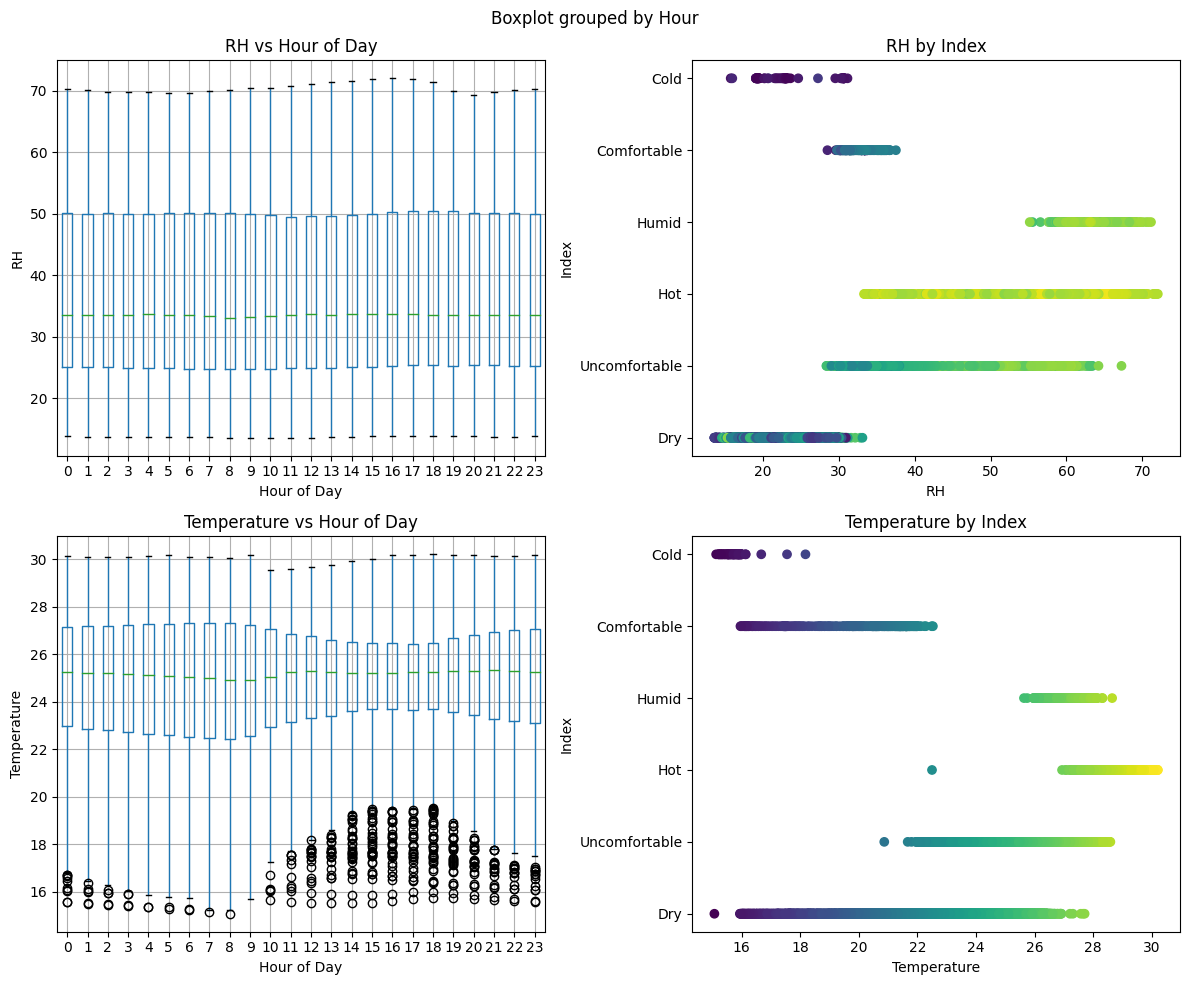

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot 1: RH vs Hour of Day
df.boxplot('RH', by='Hour', ax=axes[0, 0])
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('RH')
axes[0, 0].set_title('RH vs Hour of Day')

# Plot 2: RH by Index
axes[0, 1].scatter(df['RH'], df['Index'], c=df['Temperature'])
axes[0, 1].set_xlabel('RH')
axes[0, 1].set_ylabel('Index')
axes[0, 1].set_title('RH by Index')

# Plot 3: Temperature vs Hour of Day
df.boxplot('Temperature', by='Hour', ax=axes[1, 0])
axes[1, 0].set_xlabel('Hour of Day')
axes[1, 0].set_ylabel('Temperature')
axes[1, 0].set_title('Temperature vs Hour of Day')

# Plot 4: Temperature by Index
axes[1, 1].scatter(df['Temperature'], df['Index'], c=df['Temperature'])
axes[1, 1].set_xlabel('Temperature')
axes[1, 1].set_ylabel('Index')
axes[1, 1].set_title('Temperature by Index')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


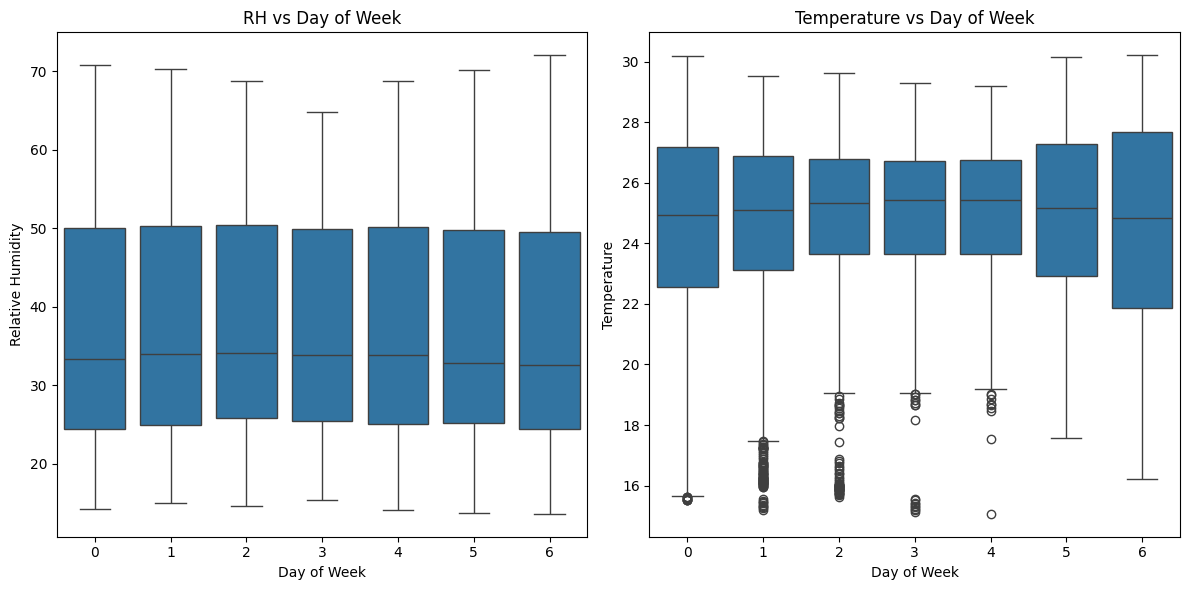

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Boxplot of RH vs Day of Week
sns.boxplot(data=df, x="DayOfWeek", y="RH", ax=axes[0])
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title('RH vs Day of Week')

# Boxplot of Temperature vs Day of Week
sns.boxplot(data=df, x="DayOfWeek", y="Temperature", ax=axes[1])
axes[1].set_xlabel('Day of Week')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Temperature vs Day of Week')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


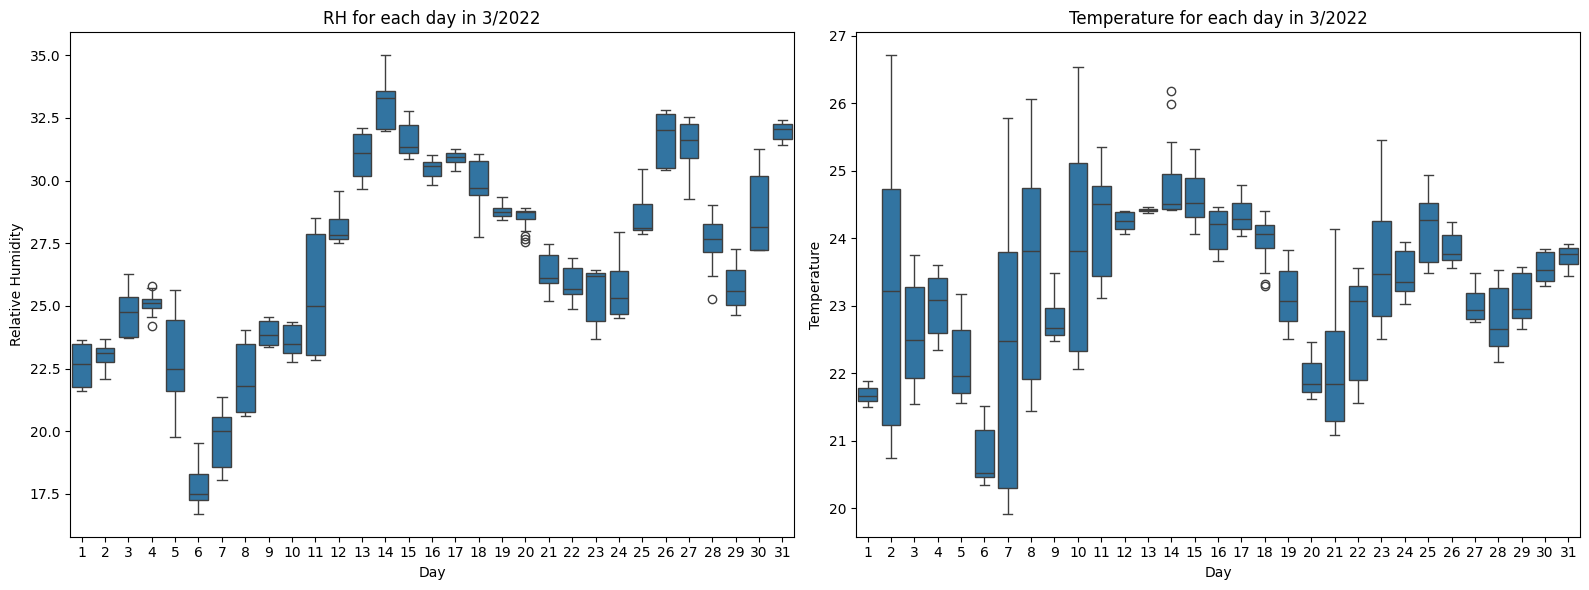

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Assuming your date column is named 'Timestamp' and is now in datetime format
# You can adjust the month and year accordingly
target_month = 3  # Specify the target month
target_year = 2022  # Specify the target year

# Filter the data for the target month and year
target_month_data = df[(df['Timestamp'].dt.month == target_month) & (df['Timestamp'].dt.year == target_year)]

# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Boxplot for Relative Humidity (RH)
sns.boxplot(data=target_month_data, x="Day", y="RH", ax=axes[0])
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Relative Humidity')
axes[0].set_title(f'RH for each day in {target_month}/{target_year}')

# Boxplot for Temperature
sns.boxplot(data=target_month_data, x="Day", y="Temperature", ax=axes[1])
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Temperature')
axes[1].set_title(f'Temperature for each day in {target_month}/{target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()




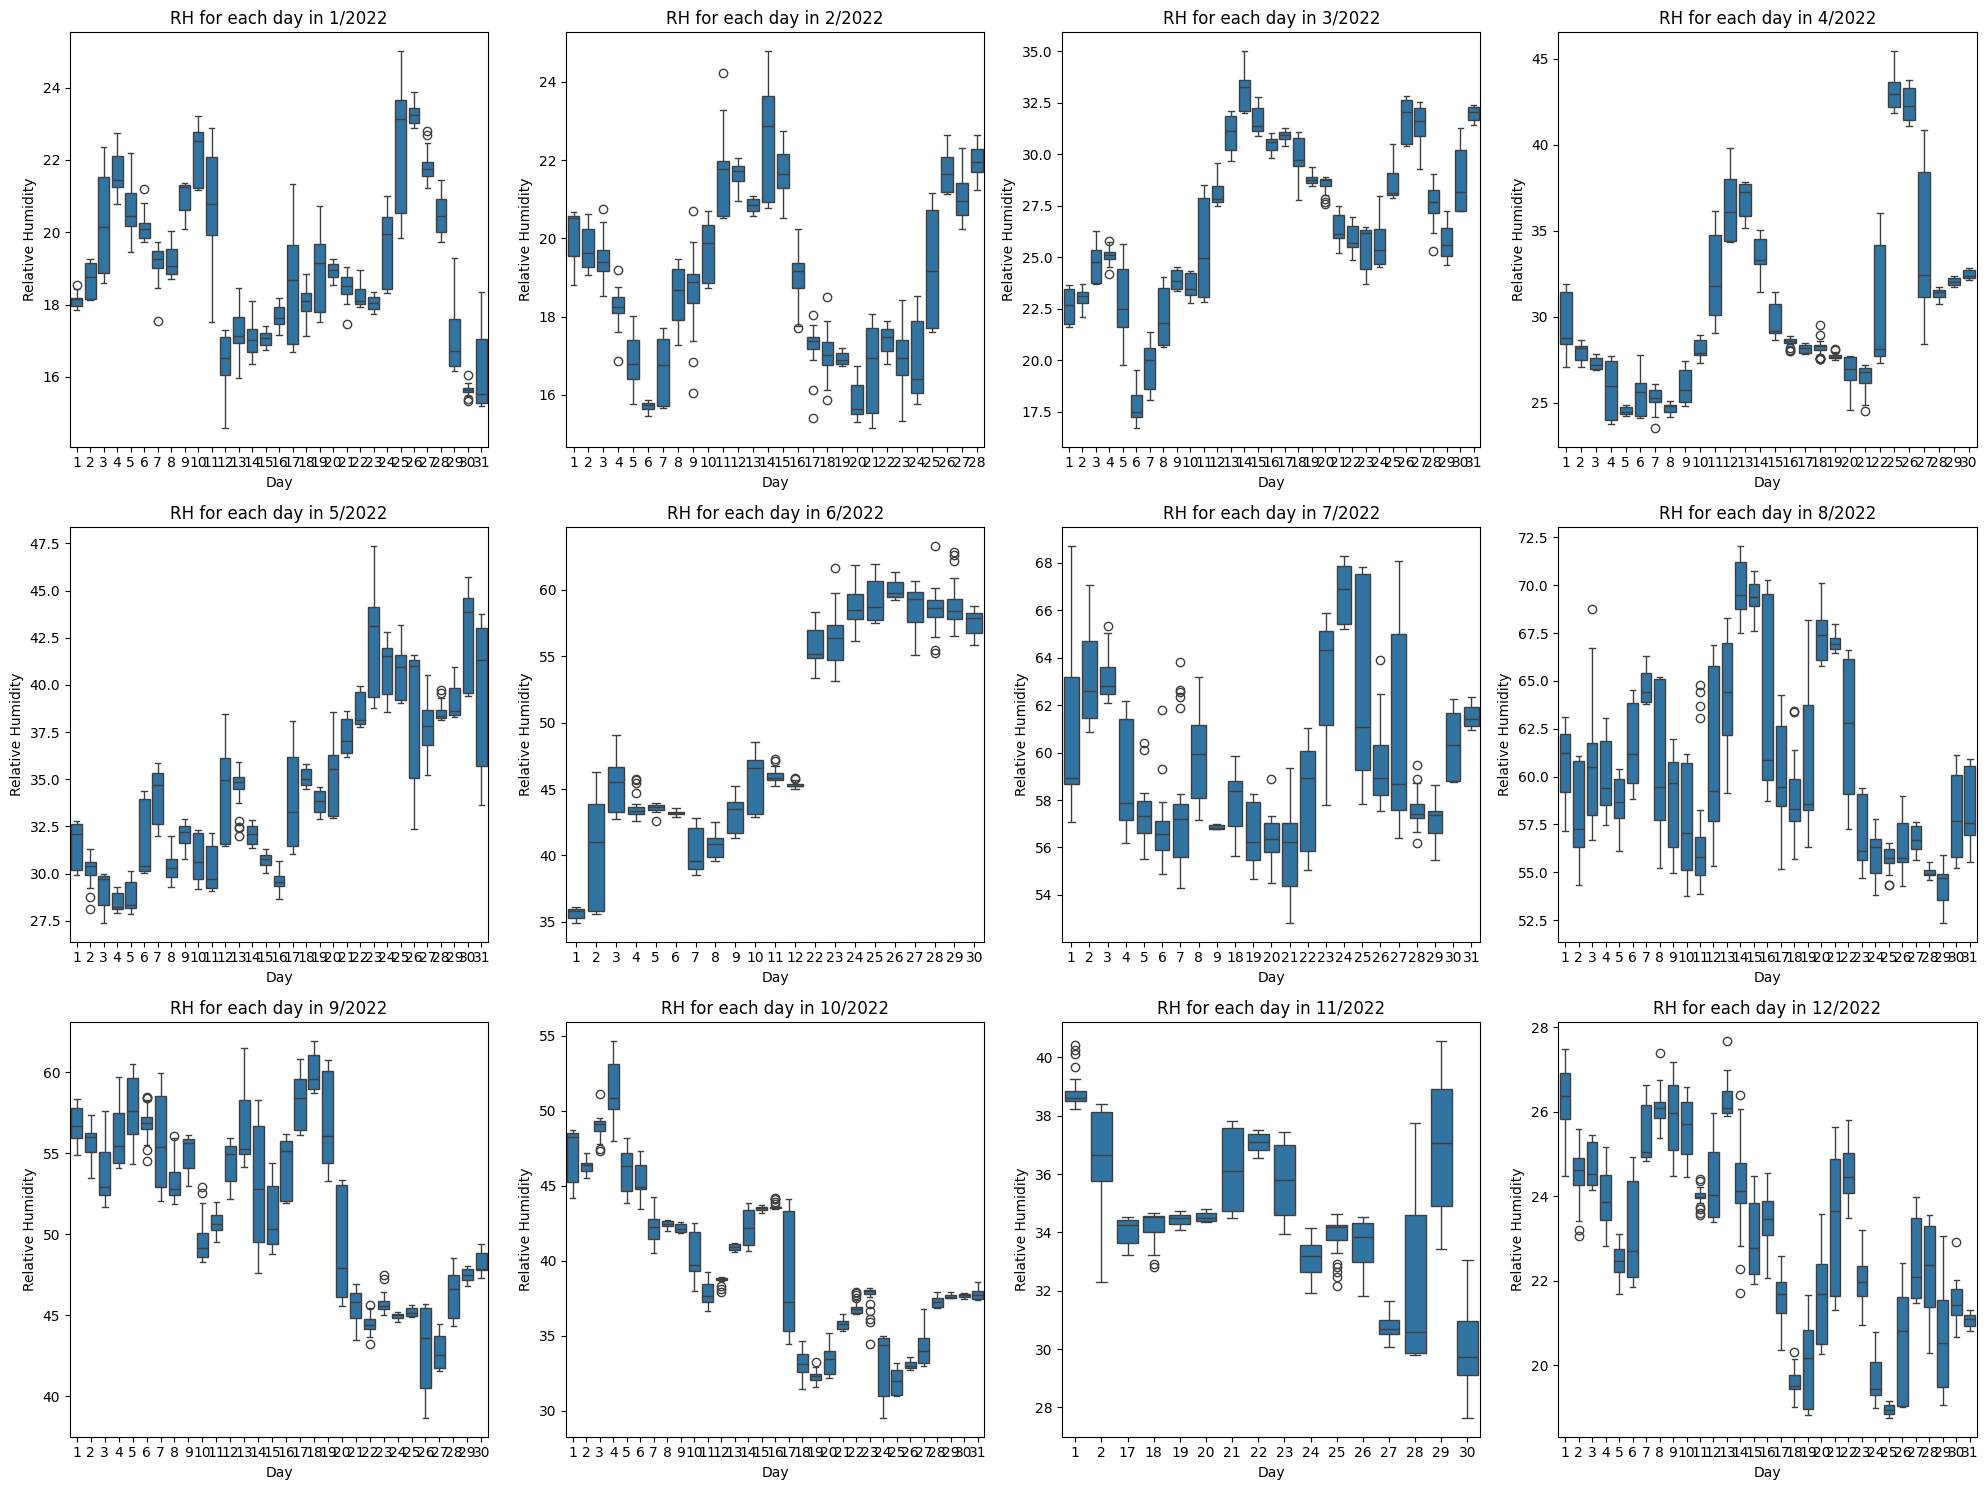

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target year
target_year = 2022

# Create a subplot grid for all months
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

# Flatten the axes for easy indexing
axes = axes.flatten()

# Loop through each month
for month in range(1, 13):
    # Filter the data for the target month and year
    target_month_data = df[(df['Timestamp'].dt.month == month) & (df['Timestamp'].dt.year == target_year)]

    # Plot boxplots for Relative Humidity (RH)
    sns.boxplot(data=target_month_data, x="Day", y="RH", ax=axes[month-1])
    axes[month-1].set_xlabel('Day')
    axes[month-1].set_ylabel('Relative Humidity')
    axes[month-1].set_title(f'RH for each day in {month}/{target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


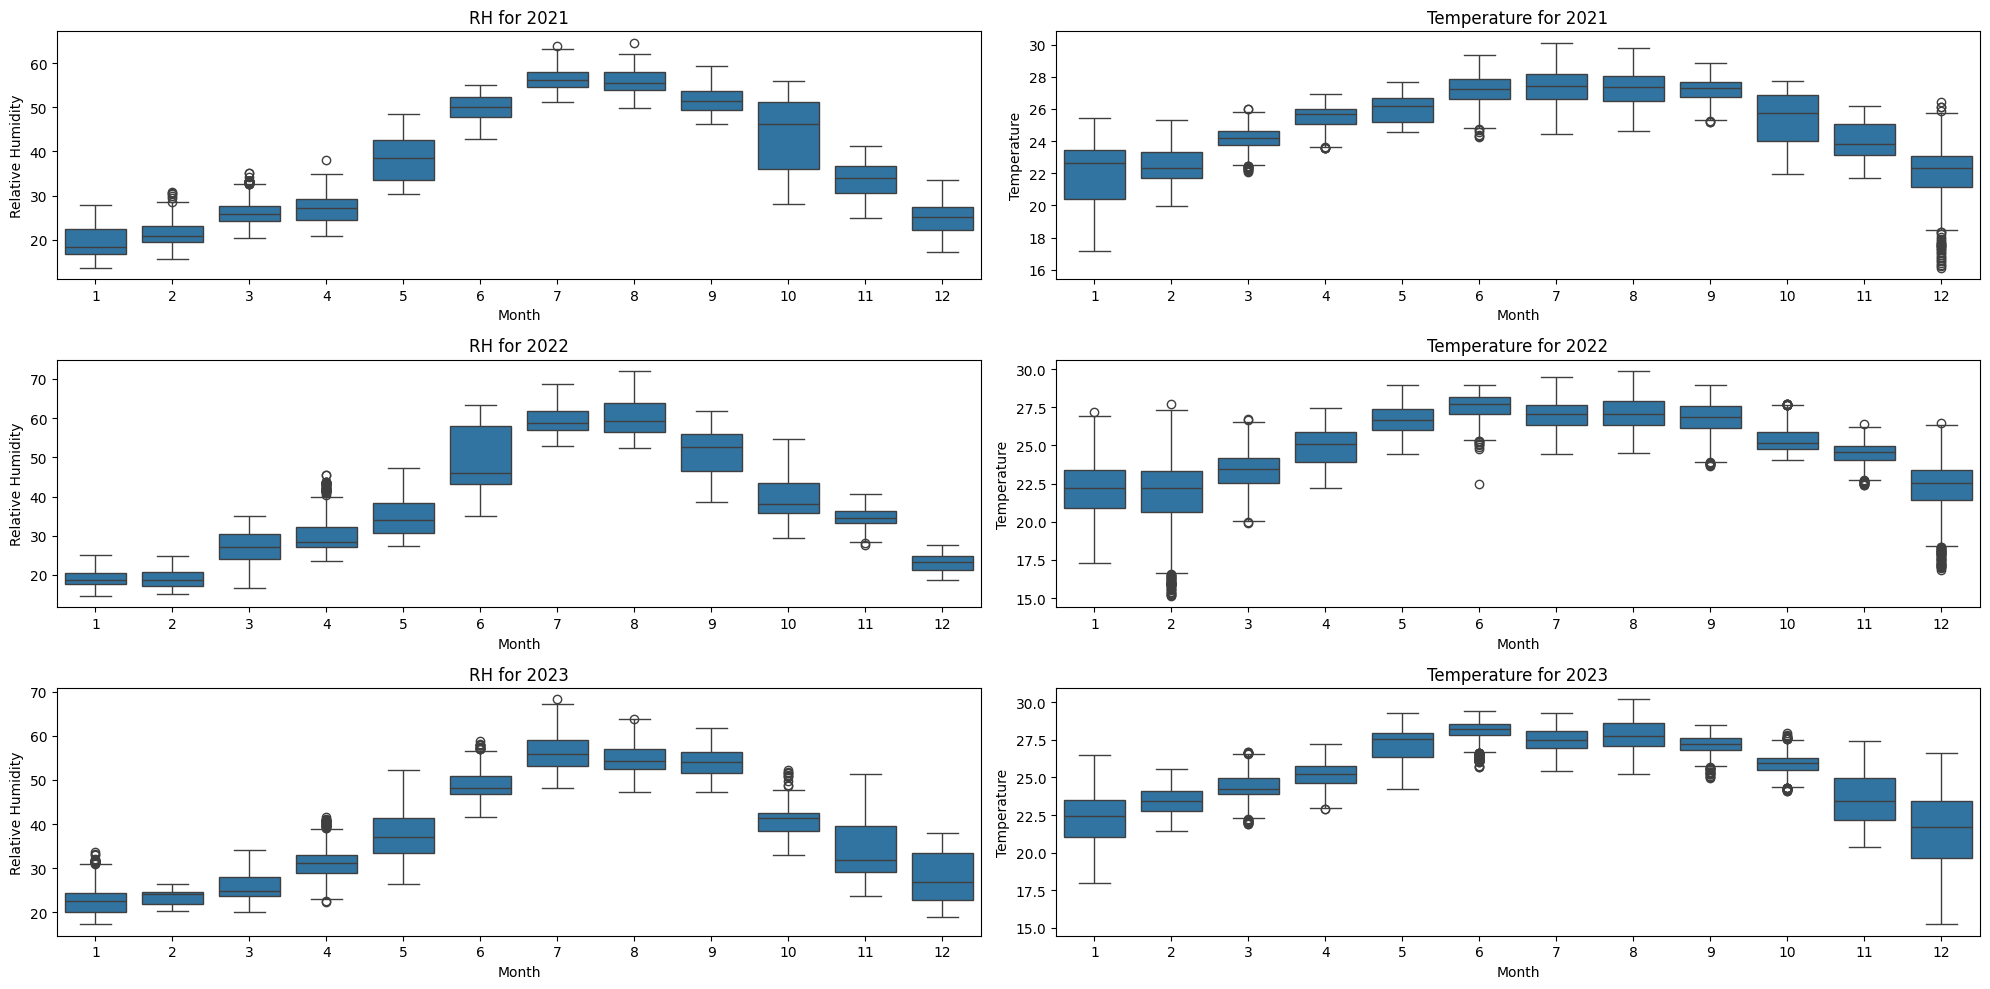

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')  # Assuming the timestamp is in seconds

# Specify the target years
target_years = [2021, 2022, 2023]

# Create a subplot grid for all years
fig, axes = plt.subplots(nrows=len(target_years), ncols=2, figsize=(20, 10))

# Flatten the axes for easy indexing
axes = axes.flatten()

for i, target_year in enumerate(target_years):
    # Create a copy of the DataFrame to avoid SettingWithCopyWarning
    target_year_data = df[df['Timestamp'].dt.year == target_year].copy()

    # Extract month and day from Timestamp
    target_year_data.loc[:, 'Month'] = target_year_data['Timestamp'].dt.month

    # Boxplot for Relative Humidity (RH)
    sns.boxplot(data=target_year_data, x="Month", y="RH", ax=axes[i * 2])
    axes[i * 2].set_xlabel('Month')
    axes[i * 2].set_ylabel('Relative Humidity')
    axes[i * 2].set_title(f'RH for {target_year}')

    # Boxplot for Temperature
    sns.boxplot(data=target_year_data, x="Month", y="Temperature", ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_xlabel('Month')
    axes[i * 2 + 1].set_ylabel('Temperature')
    axes[i * 2 + 1].set_title(f'Temperature for {target_year}')

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


<ipython-input-30-cb13b4d060b4>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Hour', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[1])
<ipython-input-30-cb13b4d060b4>:13: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.violinplot(data=df, x='Hour', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[1])
<ipython-input-30-cb13b4d060b4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Day', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[2])
<ipython-input-30-cb13b4d060b4>:20: UserWarning: The palette list has more values (8) than needed (6), which 

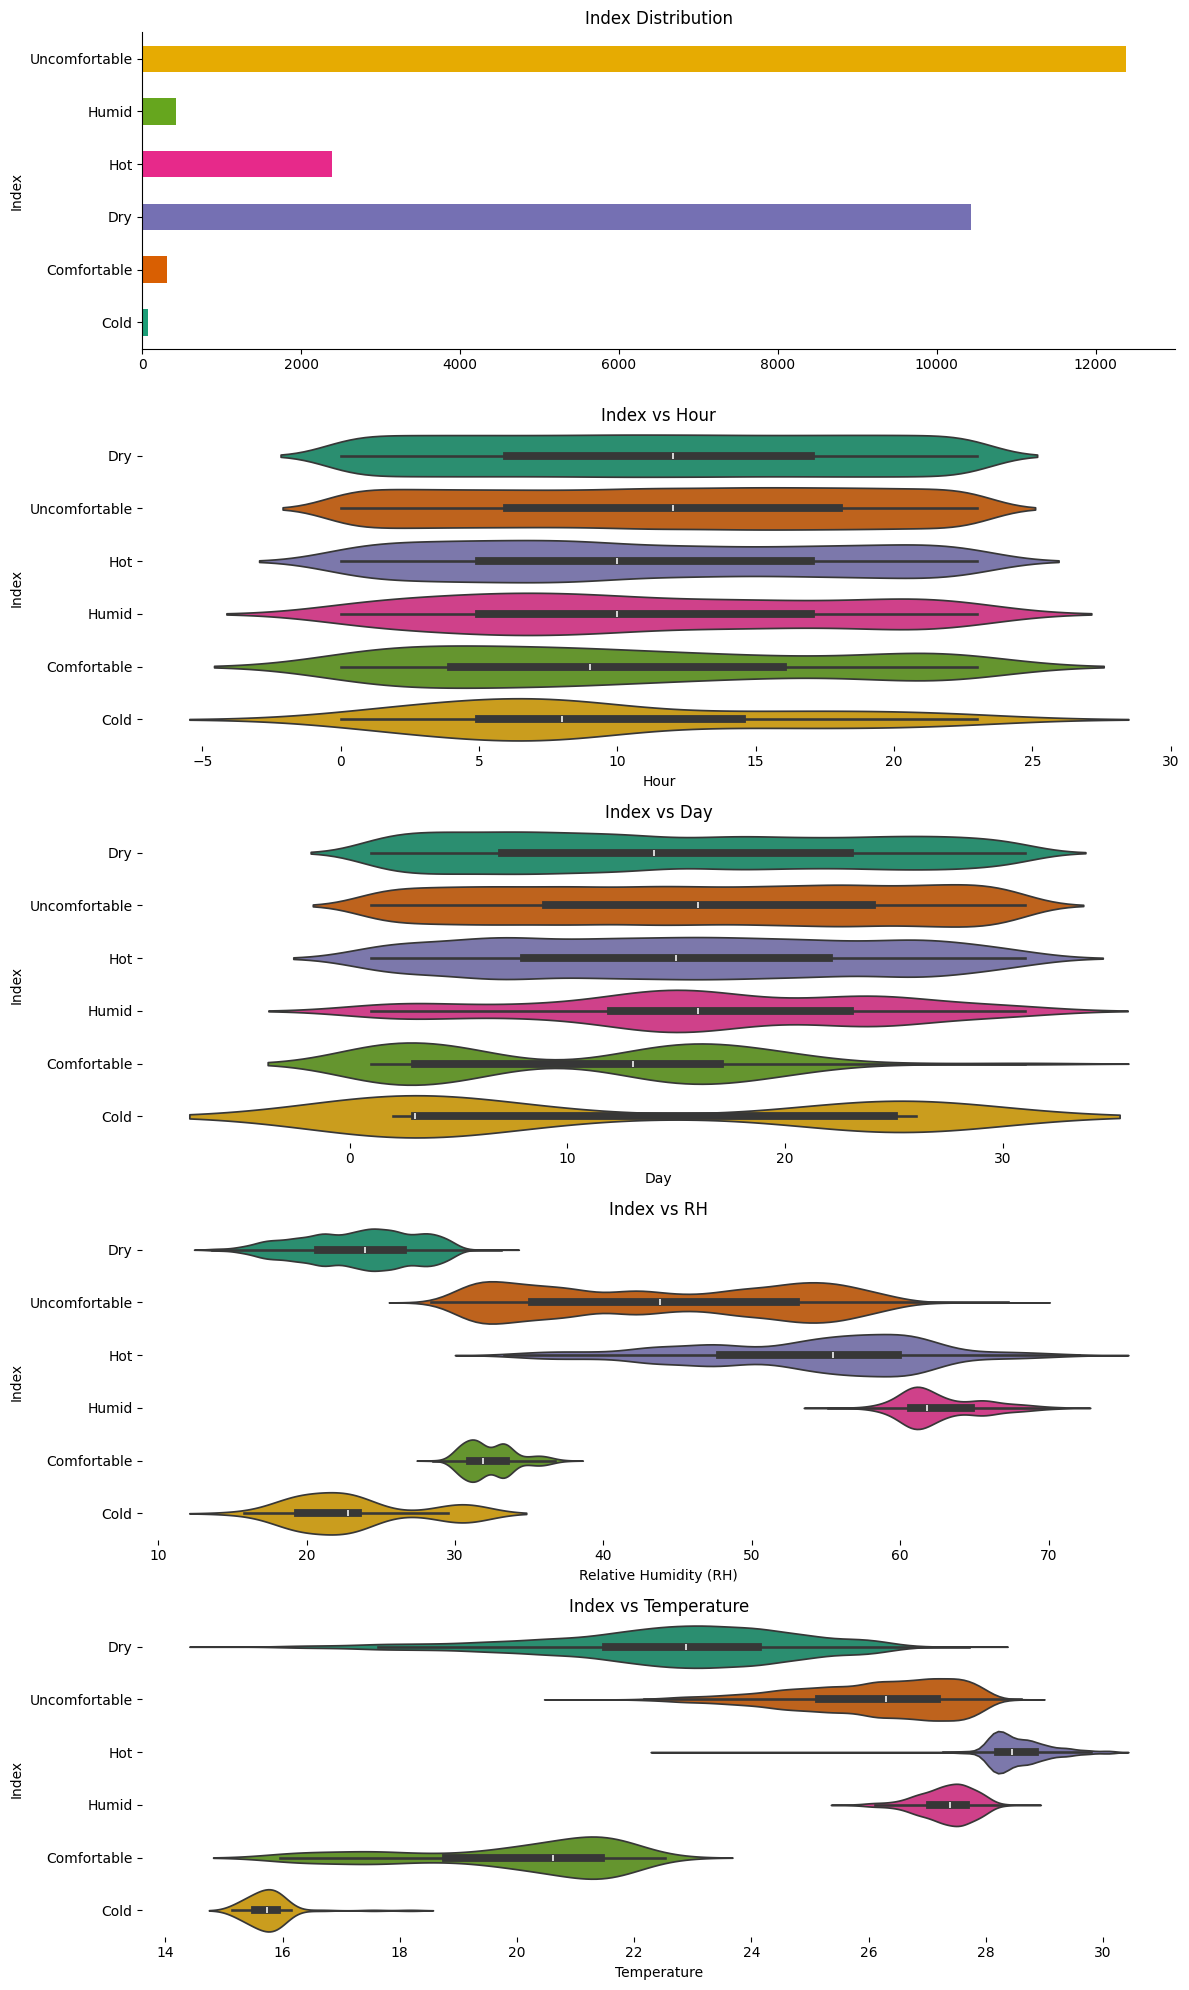

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns

# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 20))

# Plot 1: Index distribution
df.groupby('Index').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axes[0])
axes[0].set_title('Index Distribution')
axes[0].spines[['top', 'right']].set_visible(False)

# Plot 2: Index vs Hour
sns.violinplot(data=df, x='Hour', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[1])
axes[1].set_title('Index vs Hour')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[1])

# Plot 3: Index vs Day
sns.violinplot(data=df, x='Day', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[2])
axes[2].set_title('Index vs Day')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[2])

# Plot 4: Index vs RH
sns.violinplot(data=df, x='RH', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[3])
axes[3].set_title('Index vs RH')
axes[3].set_xlabel('Relative Humidity (RH)')
axes[3].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[3])

# Plot 5: Index vs Temperature
sns.violinplot(data=df, x='Temperature', y='Index', inner='box', palette=sns.color_palette('Dark2'), ax=axes[4])
axes[4].set_title('Index vs Temperature')
axes[4].set_xlabel('Temperature')
axes[4].set_ylabel('Index')
sns.despine(top=True, right=True, bottom=True, left=True, ax=axes[4])

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()



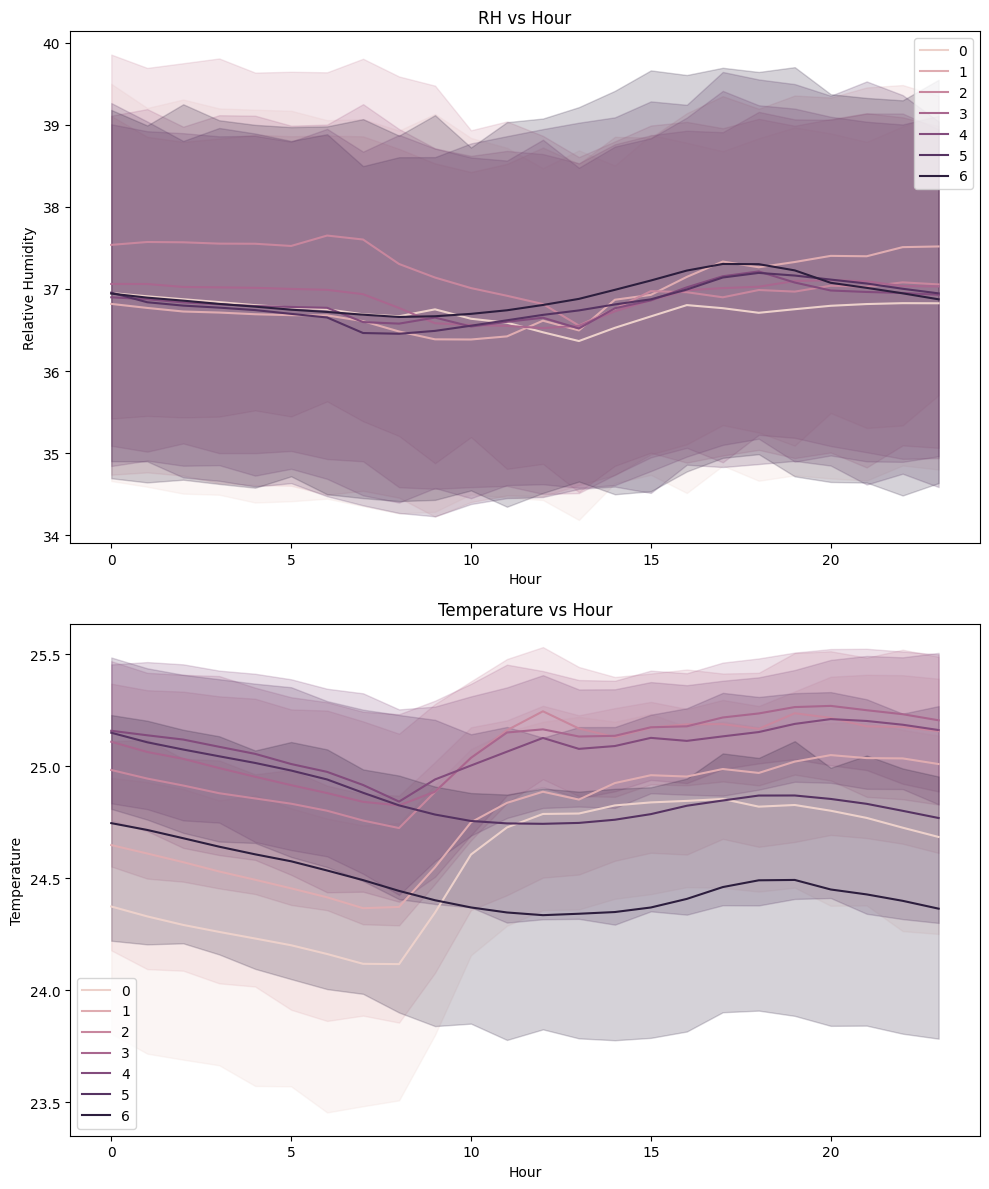

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# Plot RH vs Hour
sns.lineplot(data=df, x="Hour", y="RH", hue="DayOfWeek", ax=axes[0])
axes[0].set_title("RH vs Hour")
axes[0].set_xlabel("Hour")
axes[0].set_ylabel("Relative Humidity")
axes[0].legend()

# Plot Temperature vs Hour
sns.lineplot(data=df, x="Hour", y="Temperature", hue="DayOfWeek", ax=axes[1])
axes[1].set_title("Temperature vs Hour")
axes[1].set_xlabel("Hour")
axes[1].set_ylabel("Temperature")
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()


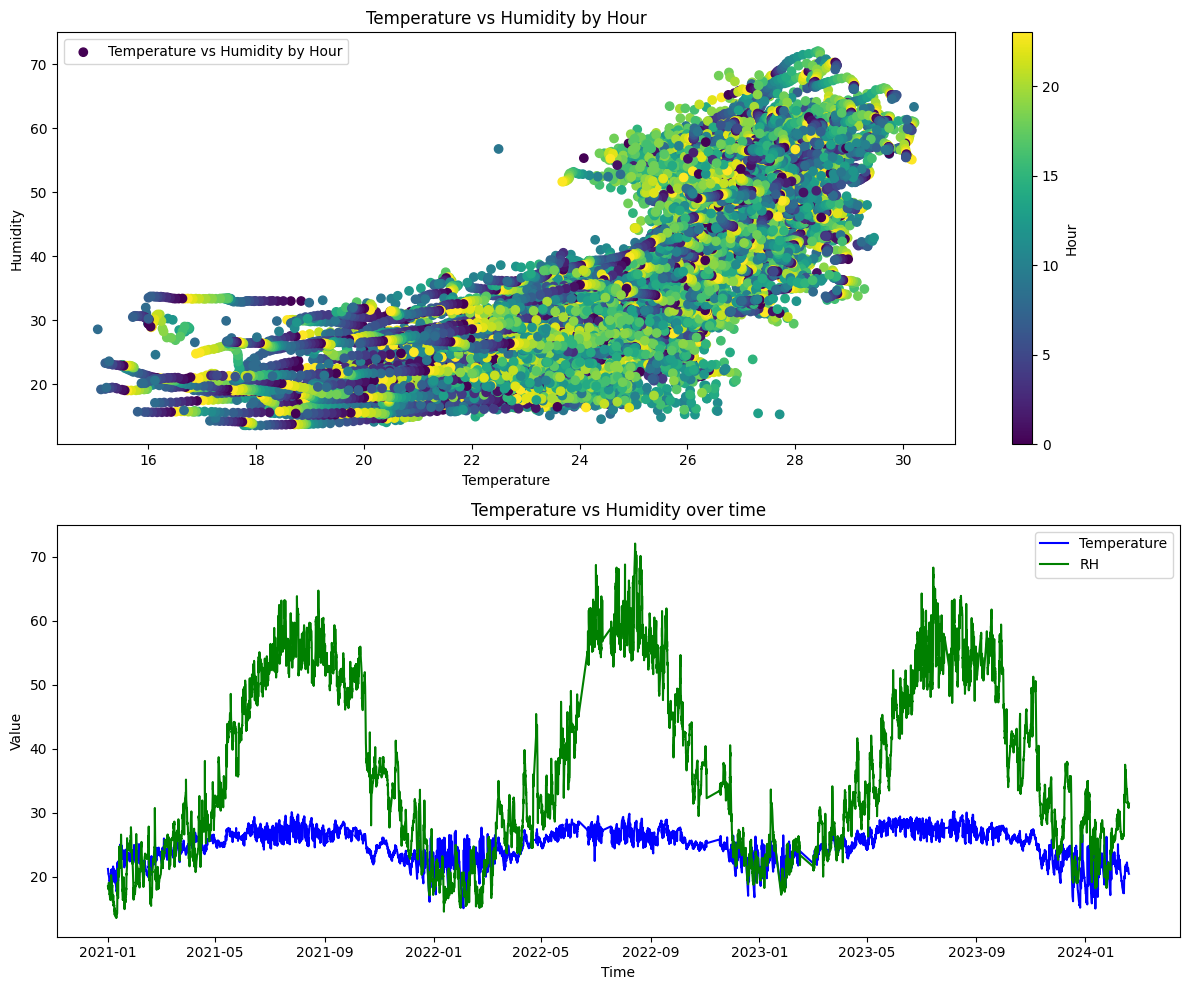

In [34]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot Temperature vs Humidity by Hour
scatter = axes[0].scatter(df['Temperature'], df['RH'], c=df['Hour'], label='Temperature vs Humidity by Hour')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Humidity')
axes[0].set_title('Temperature vs Humidity by Hour')
axes[0].legend()

# Add colorbar for the Hour values
cbar = plt.colorbar(scatter, ax=axes[0])
cbar.set_label('Hour')

# Plot Temperature vs Humidity over time
axes[1].plot(df['Timestamp'], df['Temperature'], color='blue', label='Temperature')
axes[1].plot(df['Timestamp'], df['RH'], color='green', label='RH')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Value')
axes[1].set_title('Temperature vs Humidity over time')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

